In [1]:
# Importing necessary libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


In [2]:
#reading csv file
df = pd.read_csv("Datasets/fan.csv")
df.shape

(5550, 20)

In [3]:
#creating new dataframe

#Necessary data names
dimentions = ['zcr_mean','spec_cent_mean','rms_mean','melspec_mean','amp_mean']

df = df[dimentions]

df.head()

,zcr_mean,spec_cent_mean,rms_mean,melspec_mean,amp_mean
0,0.109654,2105.182951,0.005728,0.007248,0.015913
1,0.075940,1524.399576,0.005831,0.007658,0.016215
2,0.037438,1081.963248,0.006127,0.008834,0.015449
3,0.055022,1220.102213,0.005838,0.008052,0.015978
4,0.051522,1262.663528,0.006116,0.008755,0.016088


In [4]:
df.rename(columns={'zcr_mean': 'zcr',
                   'spec_cent_mean':'spectral_centroid',
                   'rms_mean': 'rsm',
                   'melspec_mean': 'mel_spectogram',
                   'amp_mean': 'amplitude'}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5550 entries, 0 to 5549
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   zcr                5550 non-null   float64
 1   spectral_centroid  5550 non-null   float64
 2   rsm                5550 non-null   float64
 3   mel_spectogram     5550 non-null   float64
 4   amplitude          5550 non-null   float64
dtypes: float64(5)
memory usage: 216.9 KB


In [6]:
df.isnull().sum()

zcr                  0
spectral_centroid    0
rsm                  0
mel_spectogram       0
amplitude            0
dtype: int64

In Pairplor we will check how features are related to each other.

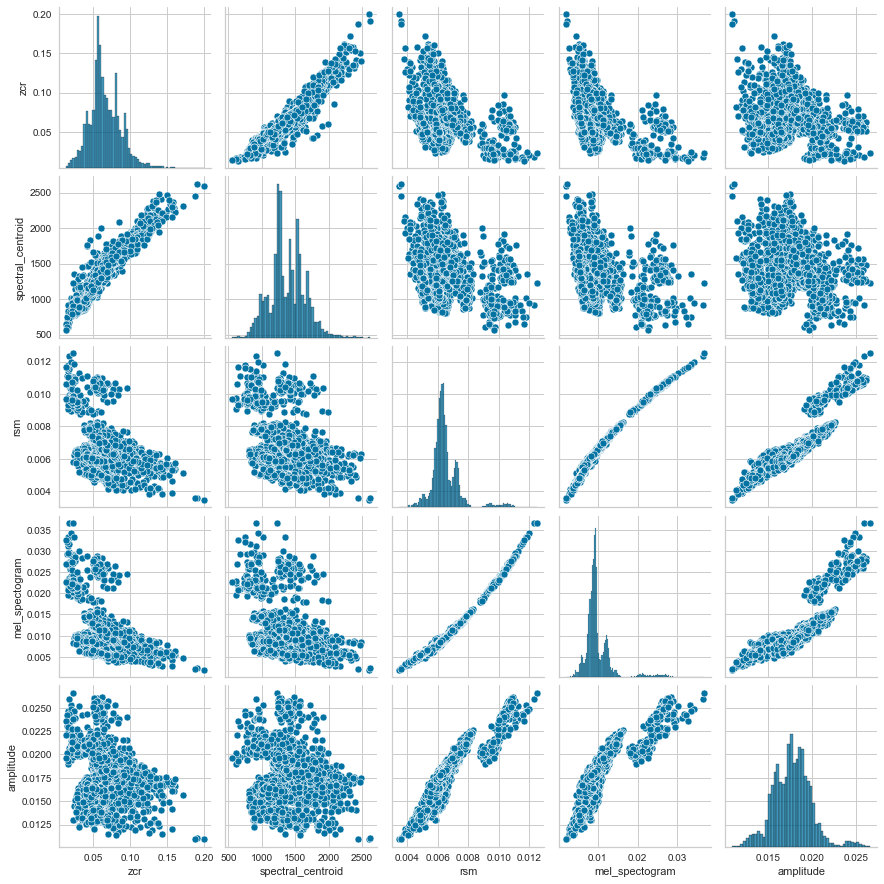

In [9]:
#create a pairplot to dataframe

sns.pairplot(df)

In [10]:
#sns.pairplot(tips,hue='sex')

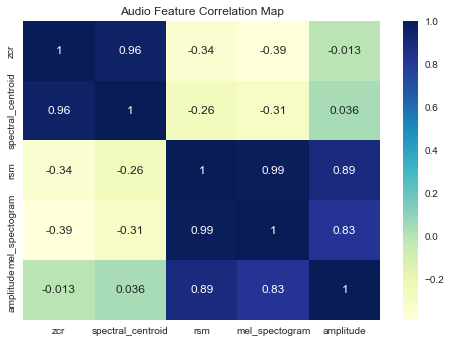

In [11]:
#Creating HeatMap

sns.heatmap(df.corr(),cmap="YlGnBu", annot=True);
plt.title("Audio Feature Correlation Map");

Text(0, 0.5, 'Spectral Centroid')

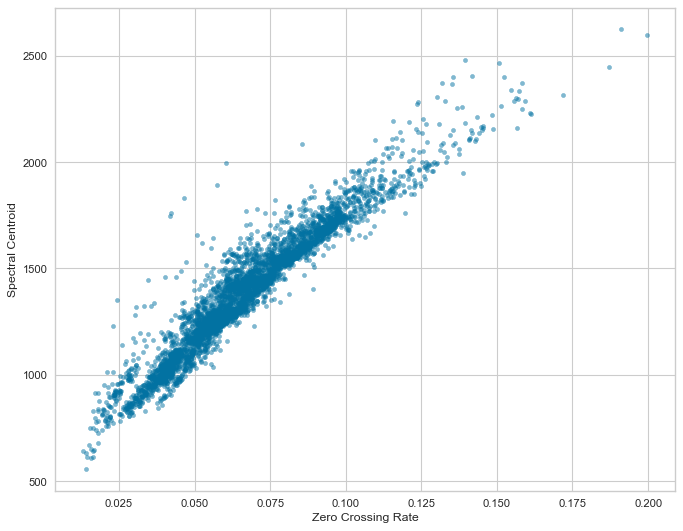

In [12]:
# Let's observe relationships between Zero Crossing Rate and Spectral Centroid
# positive, strong and linear 
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], s=15, alpha=0.5)
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')

In [13]:
# scaling data
scale = StandardScaler()
StdScale = scale.fit_transform(df)

n_max_clusters = 10

# Elbow Method
wcss = []
for cluster in range(1,n_max_clusters):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(StdScale)
    wcss.append(kmeans.inertia_)

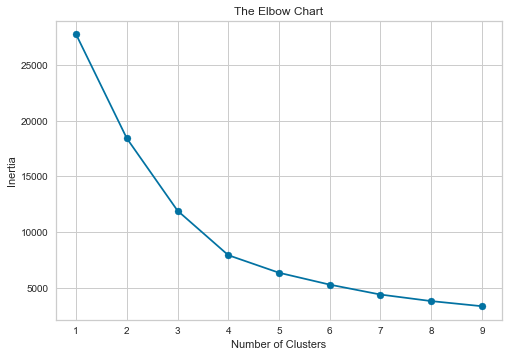

In [14]:
# plotting elbow graphics

plt.plot(range(1,n_max_clusters), wcss)
plt.scatter(range(1,n_max_clusters), wcss)

plt.title('The Elbow Chart')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

plt.show()

In [15]:
k = 3

# fit a kmeans object to the dataset
kmeans = KMeans(n_clusters=k, init='k-means++').fit(df)

y_kmeans = kmeans.predict(df)

# add cluster index to dataframe
cluster_labels = pd.Series(kmeans.labels_, name='cluster')
df = df.join(cluster_labels.to_frame())

In [16]:
c0 = (df.cluster == 0).sum()
c1 = (df.cluster == 1).sum()
c2 = (df.cluster == 2).sum()

total = c0 + c1 + c2
print('Total number of data ', total)
print('Percentage of cluster 0 ', c0/total)
print('Percentage of cluster 1 ', c1/total)
print('Percentage of cluster 2 ', c2/total)

Total number of data  5550
Percentage of cluster 0  0.1790990990990991
Percentage of cluster 1  0.4772972972972973
Percentage of cluster 2  0.3436036036036036


In [17]:
df.head()

,zcr,spectral_centroid,rsm,mel_spectogram,amplitude,cluster
0,0.109654,2105.182951,0.005728,0.007248,0.015913,2
1,0.075940,1524.399576,0.005831,0.007658,0.016215,2
2,0.037438,1081.963248,0.006127,0.008834,0.015449,0
3,0.055022,1220.102213,0.005838,0.008052,0.015978,1
4,0.051522,1262.663528,0.006116,0.008755,0.016088,1


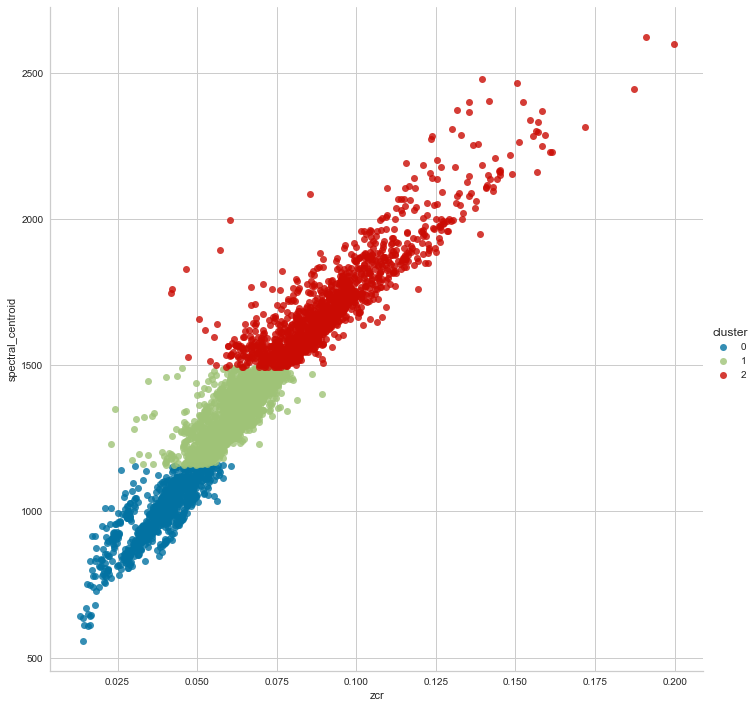

In [18]:
sns.lmplot(x='zcr', y='spectral_centroid',  height=10, data=df,
           fit_reg=False, hue='cluster')

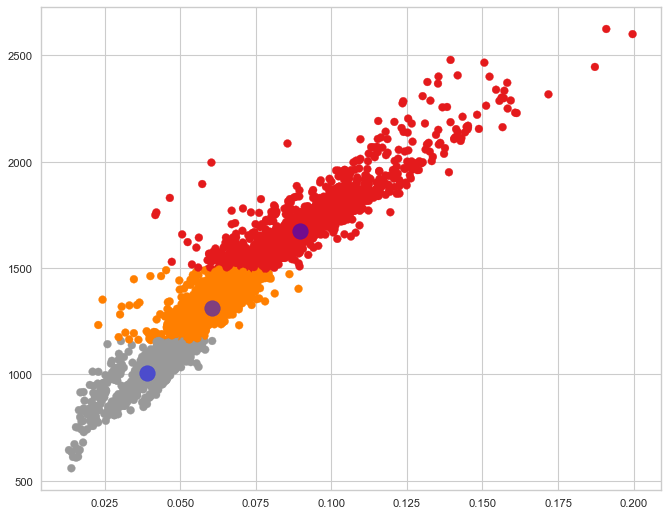

In [19]:
figure(figsize=(10, 8), dpi=80)
plt.scatter(df['zcr'], df['spectral_centroid'], c=y_kmeans, s=50, cmap='Set1_r')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=200, alpha=0.5);

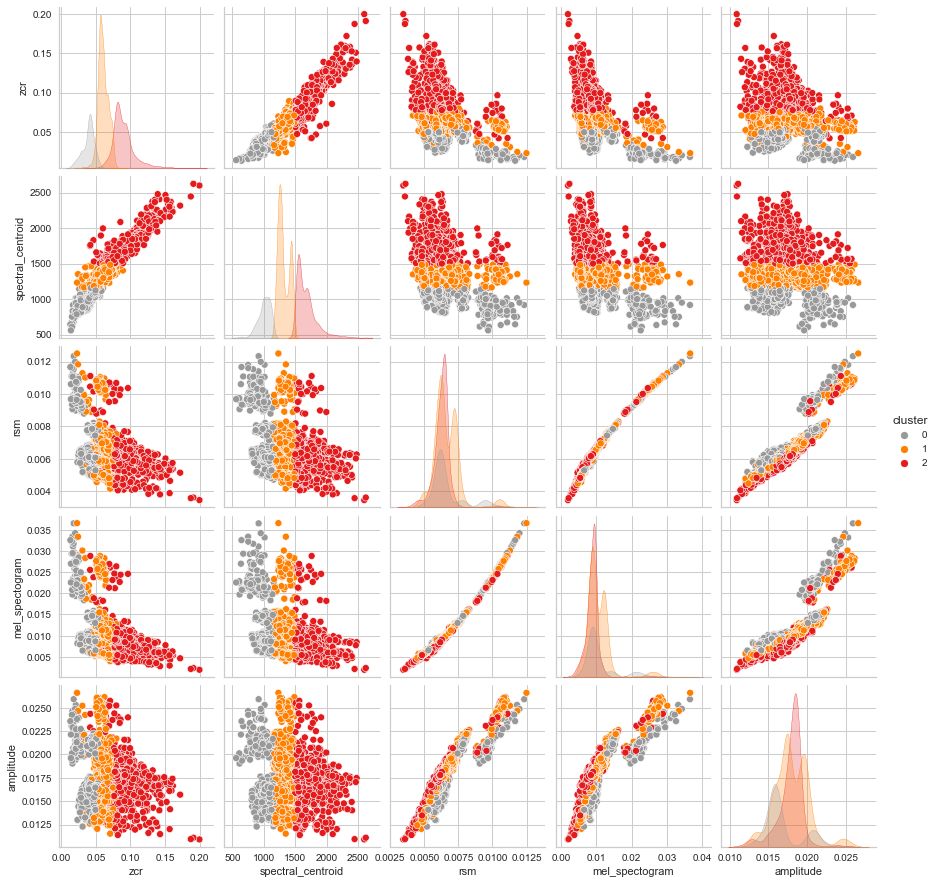

In [20]:
sns.pairplot(df, palette = 'Set1_r', hue='cluster');

In [21]:
def plot_cluster(k):
    
    fig = plt.figure()

    km = KMeans(n_clusters=k, init='k-means++', random_state=42)

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(df) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data
    
    



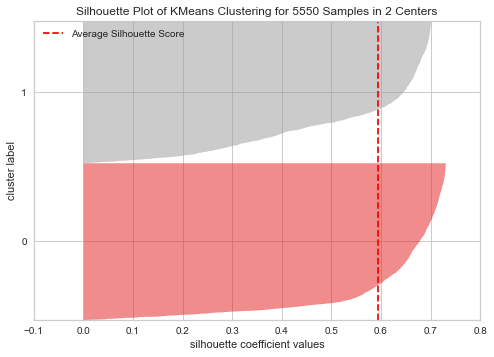

In [22]:
# Silhouette Plot in k =2
plot_cluster(2)

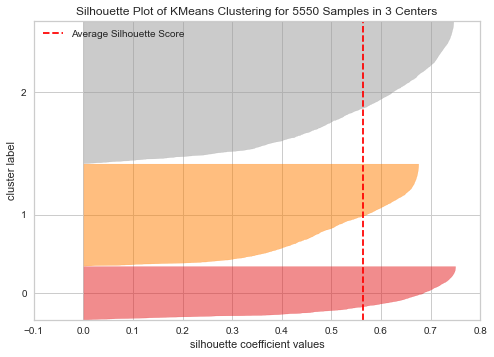

In [23]:
# Silhouette Plot in k = 3
plot_cluster(3)

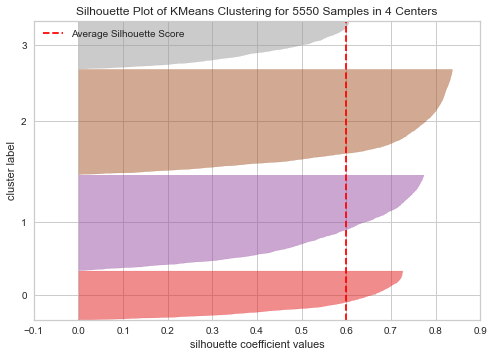

In [24]:
# Silhouette Plot in k =4

plot_cluster(4)

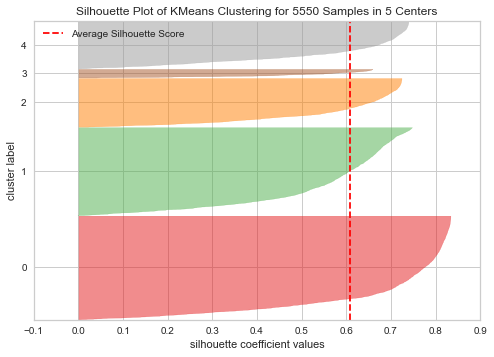

In [26]:
# Silhouette Plot in k =5

plot_cluster(5)

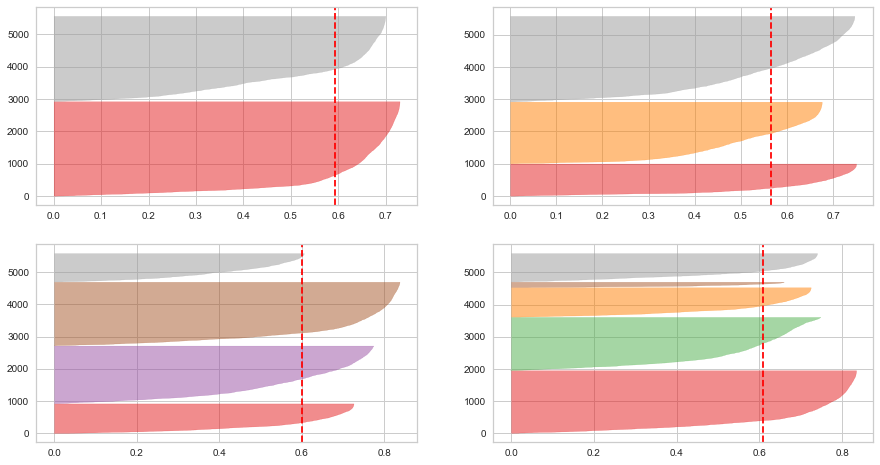

In [25]:

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(df)
